<a href="https://colab.research.google.com/github/KamilBartosik/RNN_AirPolutionPrediction/blob/main/RNN_AirPolutionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score # or something else?

from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau # needed?

In [3]:
dataset_path = '/content/gdrive/MyDrive/MachineLearning/Datasets/Air_Pollution/Dataset.csv'
df = pd.read_csv(dataset_path)

# Data preprocessing

In [4]:
df.head()

,Date,Temperature,NOx,Wind Direction,Wind Speed,PM2.5
0,1/1/19 0:00,17.2,16.2,18,2,17
1,1/1/19 1:00,17.2,17,357,2.2,20
2,1/1/19 2:00,17.0,14.6,16,2.3,14
3,1/1/19 3:00,16.8,12.8,6,2.7,15
4,1/1/19 4:00,16.7,16.3,14,2.2,10


In [5]:
df.shape

(1416, 6)

In [234]:
df = df.iloc[:, 1:]

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     1416 non-null   float64
 1   NOx             1416 non-null   float64
 2   Wind Direction  1416 non-null   int64  
 3   Wind Speed      1416 non-null   float64
 4   PM2.5           1416 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 55.4 KB


In [237]:
wrong_NOx = []
wrong_WD = []
wrong_WS = []
wrong_PM = []

def check_wrong_values(column, values):
  
  for i in range(len(df)):
    try:
      df.loc[i, column] = float(df.loc[i, column])
    except:
      values.append(i)

In [238]:
def display_examples(column, values, ex_11, ex_12, ex_21, ex_22):
  
  print('Wrong values:')
  print(df.loc[values, column])

  print('\nHow value(s) of 1st example look among neighbours:\n')
  print(df.loc[ex_11:ex_12, column])

  print('\nHow value(s) of 2nd example look among neighbours:\n')
  print(df.loc[ex_21:ex_22, column])

In [239]:
check_wrong_values('NOx', wrong_NOx)

In [240]:
display_examples('NOx', wrong_NOx, 157, 163, 1258, 1267)

Wrong values:
Series([], Name: NOx, dtype: float64)

How value(s) of 1st example look among neighbours:

157    12.8
158    13.0
159    13.1
160    16.1
161    23.0
162    21.6
163    15.0
Name: NOx, dtype: float64

How value(s) of 2nd example look among neighbours:

1258    15.1
1259    14.0
1260    10.6
1261     9.1
1262     8.1
1263     8.5
1264    12.4
1265    11.6
1266    10.9
1267    12.5
Name: NOx, dtype: float64


In [241]:
check_wrong_values('Wind Direction', wrong_WD)

In [242]:
display_examples('Wind Direction', wrong_WD, 417, 423, 1089, 1095)

Wrong values:
Series([], Name: Wind Direction, dtype: int64)

How value(s) of 1st example look among neighbours:

417    268
418    344
419    312
420    295
421    299
422    301
423    302
Name: Wind Direction, dtype: int64

How value(s) of 2nd example look among neighbours:

1089     17
1090    338
1091     31
1092      0
1093    284
1094    221
1095    256
Name: Wind Direction, dtype: int64


In [243]:
check_wrong_values('Wind Speed', wrong_WS)

In [244]:
display_examples('Wind Speed', wrong_WS, 417, 423, 1089, 1095)

Wrong values:
Series([], Name: Wind Speed, dtype: float64)

How value(s) of 1st example look among neighbours:

417    1.4
418    1.6
419    2.1
420    1.6
421    2.5
422    2.5
423    2.5
Name: Wind Speed, dtype: float64

How value(s) of 2nd example look among neighbours:

1089    2.1
1090    2.7
1091    1.5
1092    0.0
1093    1.7
1094    3.9
1095    2.4
Name: Wind Speed, dtype: float64


In [245]:
check_wrong_values('PM2.5', wrong_PM)

In [246]:
print('Wrong values:')
print(df.loc[wrong_PM, 'PM2.5'])

Wrong values:
Series([], Name: PM2.5, dtype: int64)


In [247]:
def replace_hashes(column, values):
  
  for i in values:
    df.loc[i, column] = df.loc[i, column].replace("#", "")

replace_hashes('NOx', wrong_NOx)
replace_hashes('Wind Direction', wrong_WD)
replace_hashes('Wind Speed', wrong_WS)

In [248]:
for i in wrong_PM:
  try:
    df.loc[i, 'PM2.5'] = int( (df.loc[i-1, 'PM2.5'] + df.loc[i+1, 'PM2.5']) / 2 )
  except:
    df.loc[i, 'PM2.5'] = int(df.loc[i-1, 'PM2.5'])

In [249]:
print(df.loc[wrong_PM, 'PM2.5'])

Series([], Name: PM2.5, dtype: int64)


In [250]:
df = df.astype({'NOx':'float', 'Wind Direction':'int', 'Wind Speed':'float', 'PM2.5':'int'})

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     1416 non-null   float64
 1   NOx             1416 non-null   float64
 2   Wind Direction  1416 non-null   int64  
 3   Wind Speed      1416 non-null   float64
 4   PM2.5           1416 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 55.4 KB


In [252]:
df.describe()

,Temperature,NOx,Wind Direction,Wind Speed,PM2.5
count,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000
mean,20.950282,19.421398,116.644774,2.450777,33.048729
std,3.438216,8.622356,141.731594,0.801641,17.385011
min,12.000000,5.700000,0.000000,0.000000,1.000000
25%,18.700000,13.600000,13.000000,1.900000,21.000000
50%,20.500000,17.300000,24.000000,2.500000,30.000000
75%,23.400000,23.000000,301.000000,3.000000,42.000000
max,30.500000,73.100000,360.000000,4.800000,108.000000


# Preparing data for training

## Creating train and test sets

In [253]:
train_set_size = 0.9
train_set_size = int( train_set_size*len(df) )

In [254]:
train_set = df.iloc[0:train_set_size, :]
test_set = df.iloc[train_set_size:, -1:].reset_index(drop=True)

In [255]:
train_set

,Temperature,NOx,Wind Direction,Wind Speed,PM2.5
0,17.2,16.2,18,2.0,17
1,17.2,17.0,357,2.2,20
2,17.0,14.6,16,2.3,14
3,16.8,12.8,6,2.7,15
4,16.7,16.3,14,2.2,10
...,...,...,...,...,...
1269,19.2,15.4,353,2.5,21
1270,18.9,18.1,358,2.8,28
1271,18.6,21.8,14,2.7,24
1272,18.4,20.9,5,3.1,23


In [256]:
test_set

,PM2.5
0,11
1,9
2,10
3,15
4,20
...,...
137,26
138,23
139,24
140,26


## Feature Scaling

In [258]:
# Scaler for training
sc = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = sc.fit_transform(train_set)

# Scaler for prediction
sc_predict = MinMaxScaler(feature_range=(0, 1))
sc_predict.fit_transform(train_set.iloc[:, -1:])

array([[0.14953271],
       [0.17757009],
       [0.12149533],
       ...,
       [0.21495327],
       [0.20560748],
       [0.13084112]])

## Creating data structure with n timesteps

In [259]:
n = 96

X_train = []
y_train = []

for i in range(n, len(train_set)):
  X_train.append(train_set_scaled[ i-n:i, :])
  y_train.append(train_set_scaled[ i, -1 ])

X_train, y_train = np.array(X_train), np.array(y_train)

In [260]:
X_train.shape

(1178, 96, 5)

# RNN architecture

In [335]:
def myRNN(model_name, optimizer, nb_epochs, batch_size):

  regressor = Sequential()

  if model_name == "LSTM":
    
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))

  elif model_name == "GRU":
    
    regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    regressor.add(Dropout(0.2))

    regressor.add(GRU(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(GRU(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(GRU(units = 50))
    regressor.add(Dropout(0.2))

  else:
    raise ValueError("Error: Wrong model name! Possible options: 'LSTM' or 'GRU'")

  regressor.add(Dense(units = 1))
  regressor.compile(optimizer = optimizer, loss = 'mean_squared_error')
  training = regressor.fit(X_train, y_train, epochs = nb_epochs, batch_size = batch_size)

  return regressor, training

# Prediction

## Input for prediction

In [287]:
test_inputs = df[train_set_size - n:]
test_inputs = sc.transform(test_inputs)

In [288]:
test_inputs.shape

(238, 5)

In [289]:
X_test = []

for i in range(n, len(test_inputs)):
  X_test.append(test_inputs[ i-n:i, : ])

X_test = np.array(X_test)

In [290]:
X_test.shape

(142, 96, 5)

## Prediction function

In [300]:
def make_predictions(model, name):
  
  predicted_PM25 = model.predict(X_test)
  predicted_PM25 = sc_predict.inverse_transform(predicted_PM25)

  return predicted_PM25

In [301]:
def calculate_metrics(predictions):
  
  rmse = math.sqrt(mean_squared_error(test_set, predictions))
  r2 = r2_score(test_set, predictions)
  adj_r2 = 1 - (1 - r2)*(len(test_set) - 1)/(len(test_set) - X_test.shape[1] - 1)

  return rmse, r2, adj_r2

In [325]:
def display_results(name, rmse, r2, adj_r2):

  print(f"Metrics for {name} model:\n\n\tRMSE: {' '*7}{rmse}\n\tR2: {' '*9}{r2}\n\tAdjusted R2: {adj_r2}")

## Visualisation function

In [328]:
def make_plots(model_training, predictions, name):
  
  plt.plot(model_training.history['loss'], color = 'blue')
  plt.title(f'{name} model training')
  plt.xlabel('Epoch')
  plt.ylabel('MSE loss')
  plt.show()

  plt.plot(test_set, color = 'black', label = 'Real PM 2.5')
  plt.plot(predictions, color = 'red', label = 'Predicted PM 2.5')
  plt.title(f'PM 2.5 Prediction with {name}')
  plt.xlabel('Time [hours]')
  plt.ylabel('PM 2.5')
  plt.legend()
  plt.show()

# Execute RNN training and results

In [336]:
model_lstm, training_lstm = myRNN("LSTM", "RMSProp", 100, 32)

Epoch 1/100
37/37 [==============================] - 10s 122ms/step - loss: 0.0327
Epoch 2/100
37/37 [==============================] - 5s 125ms/step - loss: 0.0222
Epoch 3/100
37/37 [==============================] - 4s 121ms/step - loss: 0.0223
Epoch 4/100
37/37 [==============================] - 4s 119ms/step - loss: 0.0183
Epoch 5/100
37/37 [==============================] - 4s 121ms/step - loss: 0.0157
Epoch 6/100
37/37 [==============================] - 5s 122ms/step - loss: 0.0161
Epoch 7/100
37/37 [==============================] - 4s 121ms/step - loss: 0.0142
Epoch 8/100
37/37 [==============================] - 5s 124ms/step - loss: 0.0133
Epoch 9/100
37/37 [==============================] - 5s 122ms/step - loss: 0.0128
Epoch 10/100
37/37 [==============================] - 5s 125ms/step - loss: 0.0124
Epoch 11/100
37/37 [==============================] - 4s 122ms/step - loss: 0.0121
Epoch 12/100
37/37 [==============================] - 5s 123ms/step - loss: 0.0114
Epoch 13/100

In [337]:
model_gru, training_gru = myRNN("GRU", "RMSProp", 100, 32)

Epoch 1/100
37/37 [==============================] - 10s 118ms/step - loss: 0.0262
Epoch 2/100
37/37 [==============================] - 4s 119ms/step - loss: 0.0166
Epoch 3/100
37/37 [==============================] - 4s 120ms/step - loss: 0.0129
Epoch 4/100
37/37 [==============================] - 4s 118ms/step - loss: 0.0134
Epoch 5/100
37/37 [==============================] - 4s 119ms/step - loss: 0.0110
Epoch 6/100
37/37 [==============================] - 4s 118ms/step - loss: 0.0106
Epoch 7/100
37/37 [==============================] - 4s 117ms/step - loss: 0.0091
Epoch 8/100
37/37 [==============================] - 4s 117ms/step - loss: 0.0084
Epoch 9/100
37/37 [==============================] - 4s 119ms/step - loss: 0.0083
Epoch 10/100
37/37 [==============================] - 4s 118ms/step - loss: 0.0073
Epoch 11/100
37/37 [==============================] - 4s 119ms/step - loss: 0.0071
Epoch 12/100
37/37 [==============================] - 4s 117ms/step - loss: 0.0070
Epoch 13/100

In [338]:
predictions_lstm = make_predictions(model_lstm, "LSTM")
predictions_gru = make_predictions(model_gru, "GRU")

In [339]:
rmse_lstm, r2_lstm, adj_r2_lstm = calculate_metrics(predictions_lstm)
rmse_gru, r2_gru, adj_r2_gru = calculate_metrics(predictions_gru)

In [341]:
display_results("LSTM", rmse_lstm, r2_lstm, adj_r2_lstm)
print("")
display_results("GRU", rmse_gru, r2_gru, adj_r2_gru)

Metrics for LSTM model:

	RMSE:        5.95742669929337
	R2:          0.8249490737458354
	Adjusted R2: 0.45150709773695086

Metrics for GRU model:

	RMSE:        5.275611235244319
	R2:          0.8627246476291968
	Adjusted R2: 0.5698705625714833


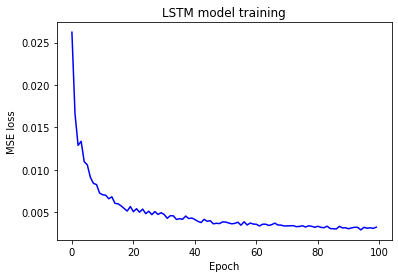

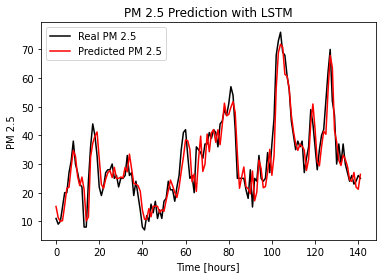

In [344]:
make_plots(training_gru, predictions_gru, "LSTM")

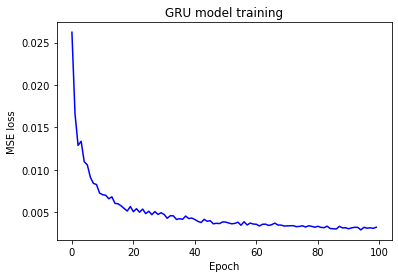

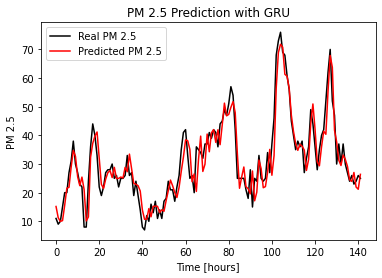

In [345]:
make_plots(training_gru, predictions_gru, "GRU")